<a href="https://colab.research.google.com/github/kimbaorrr/colab_exercises/blob/main/FuzzyLogic/FuzzyLogic_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn pandas seaborn

                HO TEN  TOAN   LY  HOA  SINH  ...  GDCD  ANH  TIN  DIEMTS  KQ
0        phạm tuấn anh   5.9  6.4  6.9   7.2  ...   7.0  6.0  8.0    25.1   Đ
1  nguyễn đoàn mỹ bình   9.1  8.8  9.2   9.4  ...   8.1  7.5  8.1    31.2   Đ
2     bùi trường giang   8.5  8.1  7.9   9.3  ...   8.4  6.5  8.3    25.5   Đ
3       trần hồng linh   9.2  8.8  8.7   9.5  ...   9.1  8.2  8.6    28.4   Đ
4        phạm phi long   7.6  6.7  5.6   8.3  ...   7.4  6.7  7.5    24.4   Đ

[5 rows x 14 columns]
    Điểm  Coefficients
0   TOAN      0.808402
1     LY      0.356215
2    HOA      0.019083
3   SINH      0.036527
4     CN     -0.256741
5    VAN      0.816789
6     SU     -0.239579
7    DIA      0.539057
8   GDCD     -0.010546
9    ANH      0.913577
10   TIN      1.706629
-10.543104520396312
3.4587949867635968
0.5889296761538225


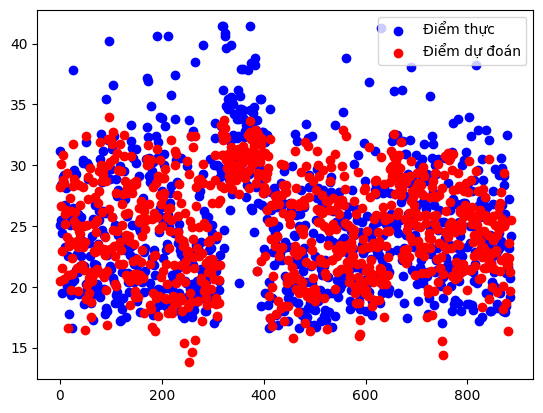

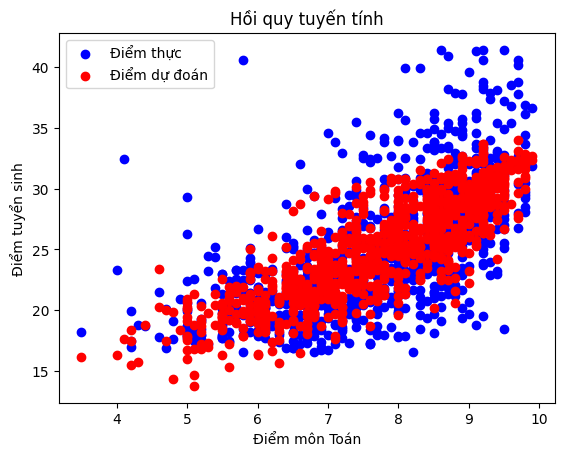

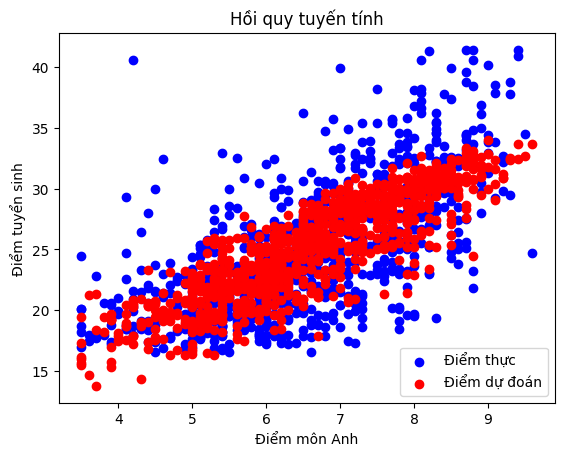

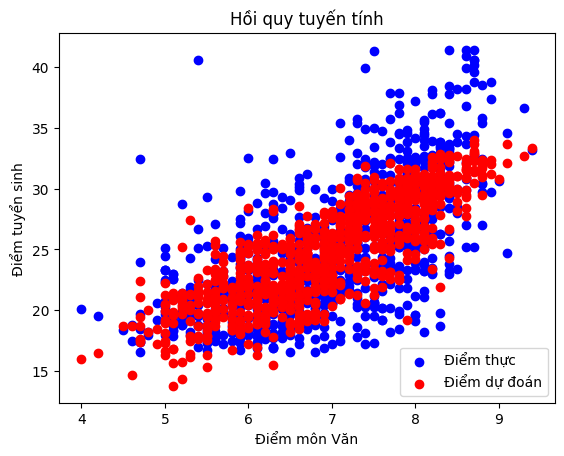

In [ ]:
from sklearn import linear_model
import pandas as pd
from pandas import ExcelWriter, ExcelFile
import numpy as np
import math
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
import seaborn as sns

ILPD = pd.read_excel('data.xlsx', sheet_name='Sheet1')
print(ILPD.head())

X = ILPD.drop(columns=['HO TEN', 'DIEMTS', 'KQ'])
Y = ILPD['DIEMTS']

model = linear_model.LinearRegression()
model.fit(X, Y)
print(
    pd.DataFrame({
        'Điểm': X.columns, 'Coefficients': model.coef_
    })
)
# Sai số
print(model.intercept_)
y_pred = model.predict(X)
train_score = math.sqrt(mean_squared_error(y_pred, Y))
print(train_score)
print(r2_score(Y, y_pred))
x_ax = range(886)
plt.scatter(x_ax, Y, color='b', label='Điểm thực')
plt.scatter(x_ax, y_pred, color='r', label='Điểm dự đoán')
plt.legend()
plt.show()

plt.scatter(X['TOAN'].values, Y, color='b', label='Điểm thực')
plt.scatter(X['TOAN'].values, y_pred, color='r', label='Điểm dự đoán')
plt.title('Hồi quy tuyến tính')
plt.xlabel('Điểm môn Toán')
plt.ylabel('Điểm tuyển sinh')
plt.legend()
plt.show()

plt.scatter(X['ANH'].values, Y, color='b', label='Điểm thực')
plt.scatter(X['ANH'].values, y_pred, color='r', label='Điểm dự đoán')
plt.title('Hồi quy tuyến tính')
plt.xlabel('Điểm môn Anh')
plt.ylabel('Điểm tuyển sinh')
plt.legend()
plt.show()

plt.scatter(X['VAN'].values, Y, color='b', label='Điểm thực')
plt.scatter(X['VAN'].values, y_pred, color='r', label='Điểm dự đoán')
plt.title('Hồi quy tuyến tính')
plt.xlabel('Điểm môn Văn')
plt.ylabel('Điểm tuyển sinh')
plt.legend()
plt.show()


[LibSVM]

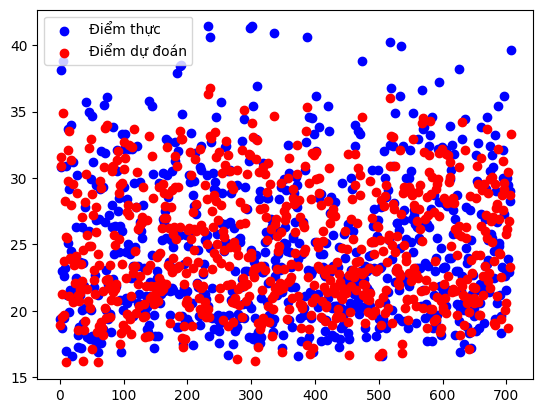

MSE: 9.623169350980461
Root MSE: 3.1021233616638235
0.6698775818366485


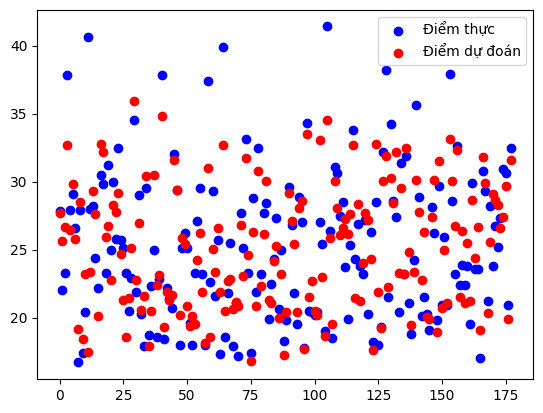

MSE: 9.719512731282306
Root MSE: 3.117613306887547
0.6629185099803884
2.136788329481584
             HO TEN  TOAN   LY  HOA  SINH   CN  VAN    SU  DIA  GDCD  ANH  TIN
0      Phạm Minh An   9.2  8.5  8.9   9.1  7.7  7.5   9.5  9.6   9.3  7.7  8.0
1  Trần Thị Minh Ân   5.5  6.5  5.1   7.5  7.2  6.2   9.3  7.7   8.8  5.7  8.1
2    Nguyễn Văn Bảo   8.8  8.2  8.4   8.3  7.0  7.6   9.7  9.1   9.5  7.1  7.5
3   Trình Ngọc Bình   9.8  9.3  9.8   9.4  9.5  8.5  10.0  9.8  10.0  8.7  8.0
4     Bùi Đức Chiến   5.5  4.6  6.4   6.4  6.8  5.0   8.2  7.2   8.6  6.5  8.4
[25.88525107 20.40121362 24.57495903 28.89828405 18.84734864 24.02586387
 27.66802249 18.56821402 26.26718603 22.87804352 25.87410954 25.18952525
 21.70247184 25.4518308  24.16505149 22.44458269 20.76075668 18.16370604
 23.93353717 18.5436953  17.38659213 27.3777721  16.5960854  21.31609553
 25.84256001 20.33762667 17.69695636 24.06394569 24.39716986]


In [ ]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from pandas import ExcelFile, ExcelWriter
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

ILPD = pd.read_excel('data.xlsx', sheet_name='Sheet1')
X = ILPD.drop(columns=['HO TEN', 'DIEMTS', 'KQ'])
Y = ILPD['DIEMTS']
# Tách tập dữ liệu & đào tạo mô hình
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)
cache_size = len(x_train)
model = SVR(C=1.0, cache_size=cache_size, epsilon=0.9, gamma='auto', kernel='poly', verbose=True)
model.fit(X, Y)
# Huấn luyện
y_pred = model.predict(x_train)
x_ax = range(len(x_train))
plt.scatter(x_ax, y_train, color='b', label='Điểm thực')
plt.scatter(x_ax, y_pred, color='r', label='Điểm dự đoán')
plt.legend()
plt.show()
mse = mean_squared_error(y_train, y_pred)
print('MSE:',mse)
rmse = math.sqrt(mse)
print('Root MSE:',rmse)
print(r2_score(y_train, y_pred))
# Dự đoán
y_test_pred = model.predict(x_test)
x_ax = range(len(x_test))
plt.scatter(x_ax, y_test, color='b', label='Điểm thực')
plt.scatter(x_ax, y_test_pred, color='r', label='Điểm dự đoán')
plt.legend()
plt.show()
mse = mean_squared_error(y_test, y_test_pred)
print('MSE:',mse)
rmse = math.sqrt(mse)
print('Root MSE:',rmse)
print(r2_score(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
print(mae)
# Dự đoán kết quả
ILPD = pd.read_excel('dudoan2019.xlsx', sheet_name='Sheet1')
print(ILPD.head())
X = ILPD.drop(columns=['HO TEN'])
pred = model.predict(X)
print(pred)

78
3.0704013429821826
0.6760658177128714


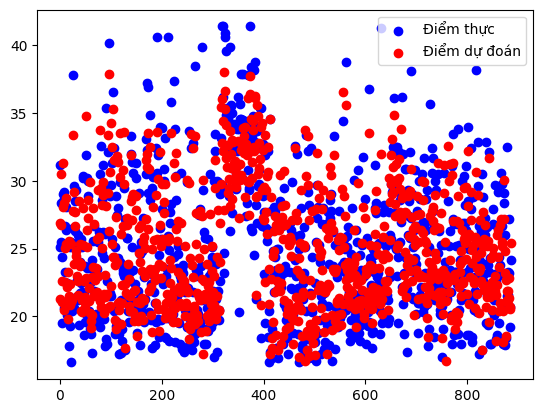

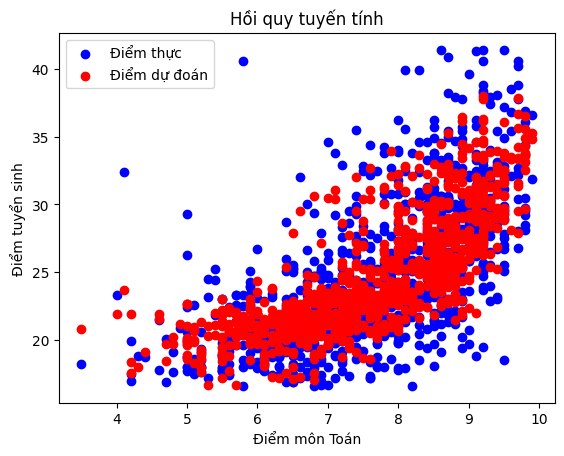

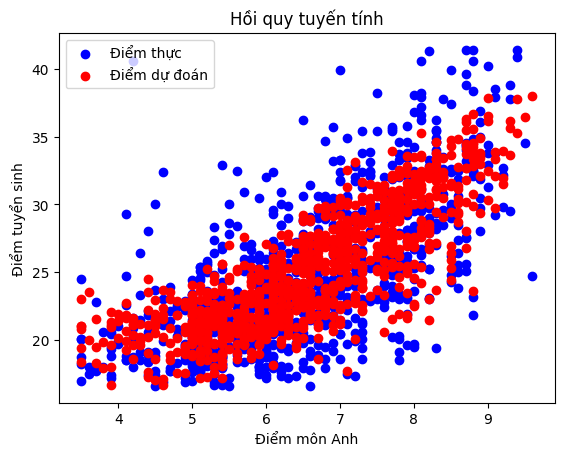

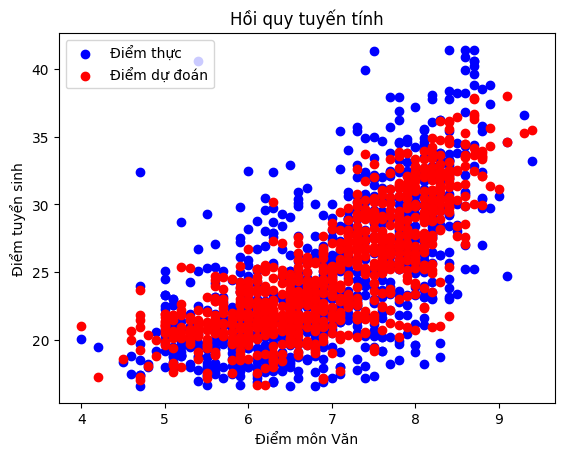

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from pandas import ExcelFile, ExcelWriter
import math
from sklearn.preprocessing import PolynomialFeatures

ILPD = pd.read_excel('data.xlsx', sheet_name='Sheet1')
X = ILPD.drop(columns=['HO TEN', 'DIEMTS', 'KQ'])
Y = ILPD['DIEMTS']
poly_reg = PolynomialFeatures()
X_poly = poly_reg.fit_transform(X)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)
print(len(lin_reg_2.coef_))
# Sai số
y_pred = lin_reg_2.predict(X_poly)
train_score = math.sqrt(mean_squared_error(y_pred, Y))
print(train_score)
print(r2_score(Y, y_pred))
x_ax = range(886)
plt.scatter(x_ax, Y, color='b', label='Điểm thực')
plt.scatter(x_ax, y_pred, color='r', label='Điểm dự đoán')
plt.legend()
plt.show()

plt.scatter(X['TOAN'].values, Y, color='b', label='Điểm thực')
plt.scatter(X['TOAN'].values, y_pred, color='r', label='Điểm dự đoán')
plt.title('Hồi quy tuyến tính')
plt.xlabel('Điểm môn Toán')
plt.ylabel('Điểm tuyển sinh')
plt.legend()
plt.show()

plt.scatter(X['ANH'].values, Y, color='b', label='Điểm thực')
plt.scatter(X['ANH'].values, y_pred, color='r', label='Điểm dự đoán')
plt.title('Hồi quy tuyến tính')
plt.xlabel('Điểm môn Anh')
plt.ylabel('Điểm tuyển sinh')
plt.legend()
plt.show()

plt.scatter(X['VAN'].values, Y, color='b', label='Điểm thực')
plt.scatter(X['VAN'].values, y_pred, color='r', label='Điểm dự đoán')
plt.title('Hồi quy tuyến tính')
plt.xlabel('Điểm môn Văn')
plt.ylabel('Điểm tuyển sinh')
plt.legend()
plt.show()

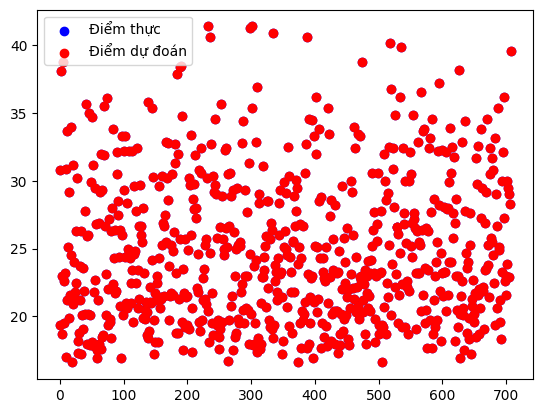

MSE: 0.0
Root MSE: 0.0
1.0


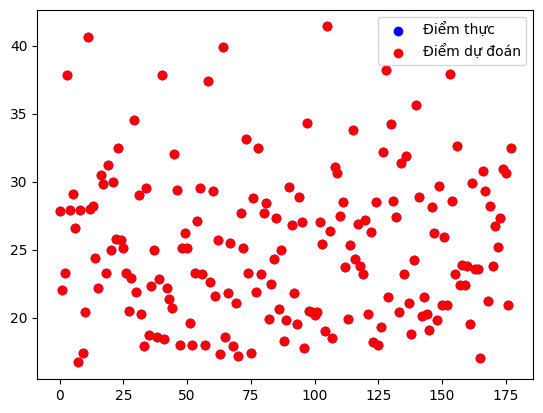

MSE: 0.0
Root MSE: 0.0
1.0
0.0


In [ ]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from pandas import ExcelFile, ExcelWriter
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

ILPD = pd.read_excel('data.xlsx', sheet_name='Sheet1')
X = ILPD.drop(columns=['HO TEN', 'DIEMTS', 'KQ'])
Y = ILPD['DIEMTS']
# Tách tập dữ liệu & đào tạo mô hình
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)
model = DecisionTreeRegressor(random_state=40)
model.fit(X, Y)
# Huấn luyện
y_pred = model.predict(x_train)
x_ax = range(len(x_train))
plt.scatter(x_ax, y_train, color='b', label='Điểm thực')
plt.scatter(x_ax, y_pred, color='r', label='Điểm dự đoán')
plt.legend()
plt.show()
mse = mean_squared_error(y_train, y_pred)
print('MSE:',mse)
rmse = math.sqrt(mse)
print('Root MSE:',rmse)
print(r2_score(y_train, y_pred))
# Dự đoán
y_test_pred = model.predict(x_test)
x_ax = range(len(x_test))
plt.scatter(x_ax, y_test, color='b', label='Điểm thực')
plt.scatter(x_ax, y_test_pred, color='r', label='Điểm dự đoán')
plt.legend()
plt.show()
mse = mean_squared_error(y_test, y_test_pred)
print('MSE:',mse)
rmse = math.sqrt(mse)
print('Root MSE:',rmse)
print(r2_score(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
print(mae)

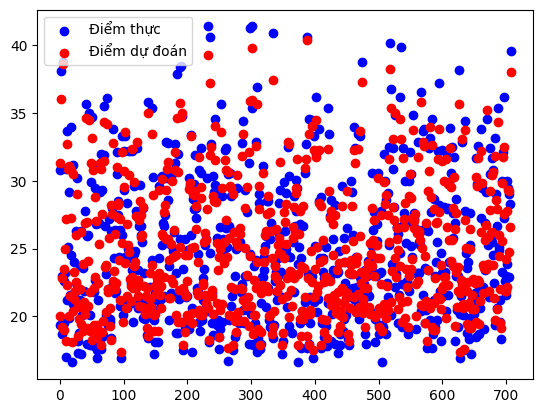

MSE: 1.9719082274011301
Root MSE: 1.4042464980911045
0.9323537715399818


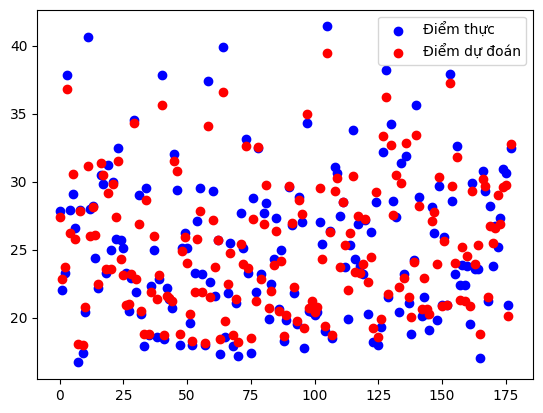

MSE: 2.1300478932584266
Root MSE: 1.4594683598003853
0.926128013047218
1.0352528089887638


In [ ]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from pandas import ExcelFile, ExcelWriter
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

ILPD = pd.read_excel('data.xlsx', sheet_name='Sheet1')
X = ILPD.drop(columns=['HO TEN', 'DIEMTS', 'KQ'])
Y = ILPD['DIEMTS']
# Tách tập dữ liệu & đào tạo mô hình
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)
model = RandomForestRegressor(n_estimators=20, random_state=40)
model.fit(X, Y)
# Huấn luyện
y_pred = model.predict(x_train)
x_ax = range(len(x_train))
plt.scatter(x_ax, y_train, color='b', label='Điểm thực')
plt.scatter(x_ax, y_pred, color='r', label='Điểm dự đoán')
plt.legend()
plt.show()
mse = mean_squared_error(y_train, y_pred)
print('MSE:',mse)
rmse = math.sqrt(mse)
print('Root MSE:',rmse)
print(r2_score(y_train, y_pred))
# Dự đoán
y_test_pred = model.predict(x_test)
x_ax = range(len(x_test))
plt.scatter(x_ax, y_test, color='b', label='Điểm thực')
plt.scatter(x_ax, y_test_pred, color='r', label='Điểm dự đoán')
plt.legend()
plt.show()
mse = mean_squared_error(y_test, y_test_pred)
print('MSE:',mse)
rmse = math.sqrt(mse)
print('Root MSE:',rmse)
print(r2_score(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
print(mae)